In [344]:
import pandas as pd
import numpy as np

In [346]:
zomato = pd.read_csv("C:\\Users\\Bibha\\Downloads\\archive\\zomato.csv")

In [347]:
zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


Deleting the unwanted columns

In [351]:
zomato.drop(columns=['url', 'address','phone', 'reviews_list', 'dish_liked', 'menu_item'], inplace = True)


In [353]:
zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [355]:
zomato.isna().sum() #checking for missing values

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [357]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


**Cleaning the RATE columns**

In [437]:
zomato['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [439]:
def udf1(x):
    if (x== 'NEW' or x=='-'):
        return np.nan
    else:
        return x

zomato['rate'] = zomato['rate'].apply(udf1)

In [441]:
def udf2(x):
    value = str(x).split('/')
    return float(value[0])
    

zomato['rate'] = zomato['rate'].apply(udf2)

In [443]:
meanofrate = zomato['rate'].mean()
meanofrate

3.7017094816114535

In [445]:
zomato['rate'] = zomato['rate'].fillna(meanofrate)

In [447]:
zomato.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

Deleting the unwanted null values

In [450]:
zomato.dropna(inplace = True)

**Cleaning the 'approx_cost(for two people)' column**

In [456]:
zomato['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [466]:
def udf3(x):
    x = x.replace(',','')
    return x

zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(udf3)

In [468]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(float)

**Cleaning the 'REST' column**

In [471]:
x = zomato['rest_type'].value_counts().reset_index().sort_values(by='count', ascending = False)
list = x[x['count']<100]['rest_type'].values

In [473]:
def udf4(x):
    if x in list:
        return 'others'
    else:
        return x
        
zomato['rest_type'] = zomato['rest_type'].apply(udf4)


In [476]:
zomato['rest_type'].value_counts()

rest_type
Quick Bites                    19046
Casual Dining                  10273
Cafe                            3687
Delivery                        2578
Dessert Parlor                  2245
Takeaway, Delivery              2014
others                          1493
Bakery                          1141
Casual Dining, Bar              1136
Beverage Shop                    865
Bar                              686
Food Court                       619
Sweet Shop                       468
Bar, Casual Dining               415
Lounge                           396
Pub                              357
Fine Dining                      346
Casual Dining, Cafe              311
Beverage Shop, Quick Bites       293
Bakery, Quick Bites              286
Mess                             264
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                

**Cleaning the 'LOCATION ' column**

In [479]:
y= zomato['location'].value_counts().reset_index().sort_values(by= 'count', ascending = False)
ylist= y[y['count']<100]['location'].values
ylist

array([], dtype=object)

In [481]:
def udf5(x):
    if x in ylist:
        return 'others'
    else:
        return x

zomato['location'] = zomato['location'].apply(udf5)

In [483]:
zomato['location'].value_counts()

location
BTM                              5071
HSR                              2496
Koramangala 5th Block            2481
JP Nagar                         2219
Whitefield                       2109
                                 ... 
Varthur Main Road, Whitefield     109
South Bangalore                   107
Koramangala 2nd Block             102
Hosur Road                        102
Kaggadasapura                     101
Name: count, Length: 66, dtype: int64

In [485]:
zomato['location'] = zomato['location'].astype(str)

**Cleaning the 'Cuisines ' column**

In [488]:
zomato['cuisines'].value_counts()

cuisines
North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: count, Length: 2704, dtype: int64

In [490]:
z= zomato['cuisines'].value_counts().reset_index().sort_values(by= 'count', ascending = False)
zlist = z[z['count']<20]['cuisines'].values
zlist

array(['Finger Food, Asian, European, Italian',
       'Goan, Seafood, Konkan, Desserts', 'Juices, Beverages, Ice Cream',
       ..., 'Mughlai, Chinese, Kebab', 'BBQ, Seafood, Fast Food',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [499]:
def udf6(x):
    if x in zlist:
        return 'others'
    else:
        return x



In [501]:
zomato['cuisines']= zomato['cuisines'].apply(udf6)

In [502]:
zomato['cuisines'].value_counts()

cuisines
others                                         14394
North Indian                                    2858
North Indian, Chinese                           2355
South Indian                                    1822
Biryani                                          906
                                               ...  
Fast Food, Burger, Pizza                          20
Andhra, Chinese                                   20
Bakery, Beverages                                 20
Mangalorean, Seafood, Chinese, North Indian       20
Chettinad                                         20
Name: count, Length: 370, dtype: int64

**Cleaning the 'listedin(type)' column**

In [505]:
zomato['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

**DATA VISUALIZATION**

In [508]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Most crowded location**

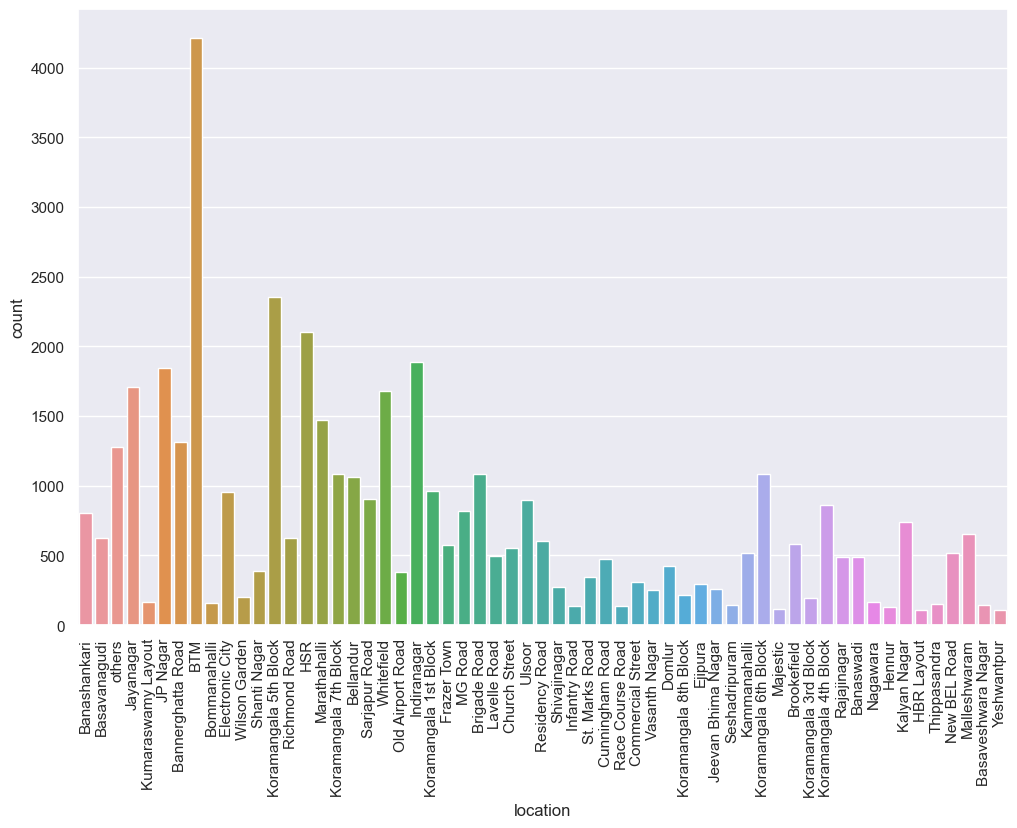

In [230]:
plt.figure(figsize = (12,8))
sns.countplot(x='location', data=zomato)
plt.xticks(rotation = 90)
plt.show()

**Visualizing the online order**

In [549]:
zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari


<Axes: xlabel='online_order', ylabel='count'>

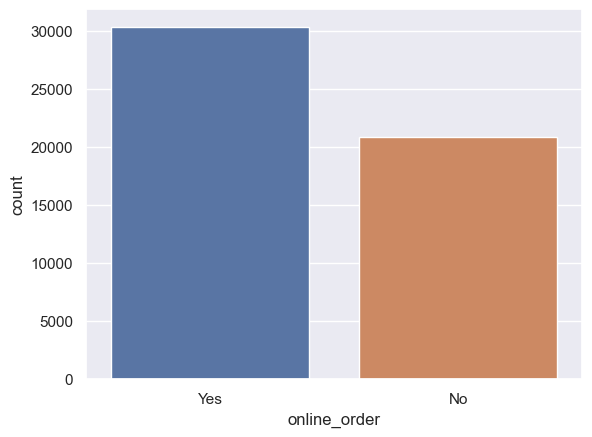

In [513]:
zomato.columns
sns.countplot(x= 'online_order' , data= zomato)

**visualizing the book table**

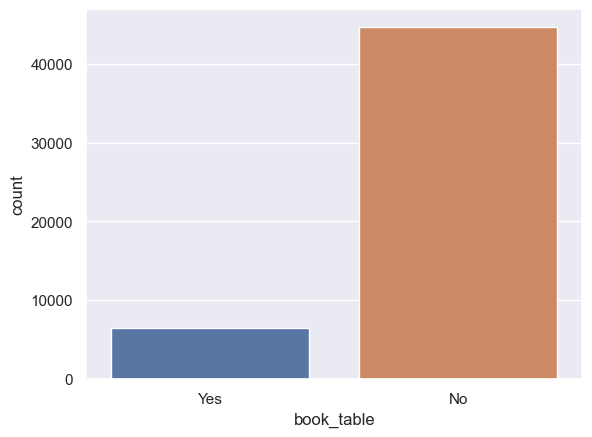

In [521]:
sns.countplot(x= 'book_table', data = zomato)
plt.show()

**visualizing online order vs rate**

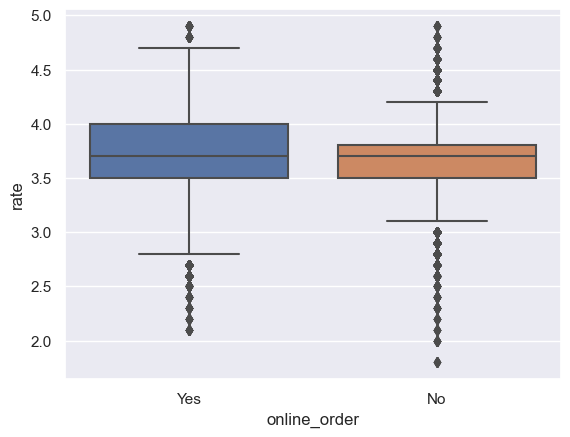

In [523]:
sns.boxplot(x= 'online_order', y ='rate' , data = zomato)
plt.show()

**Visualizing Rate as per Booktable**

In [618]:
zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),"online_order[1,0]"
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,1


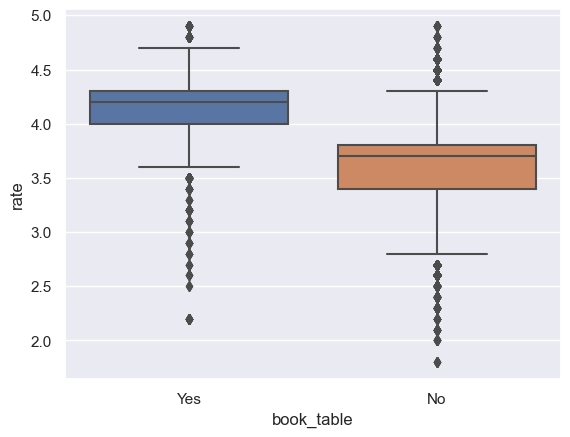

In [526]:
sns.boxplot(x= 'book_table' , y = 'rate', data = zomato)
plt.show()

**Visualizing Online Order Faclity , Location Wise**

In [632]:
zomato['online_order[1,0]'] = np.where(zomato['online_order'] == 'Yes' , 1, 0)
x1= zomato.groupby('location')['online_order[1,0]'].sum().reset_index(name= 'online_order_resturant')
x1

,location,online_order_resturant
0,BTM,3305
1,Banashankari,507
2,Banaswadi,343
3,Bannerghatta Road,924
4,Basavanagudi,441
...,...,...
61,Vasanth Nagar,147
62,Whitefield,1123
63,Wilson Garden,134
64,Yeshwantpur,93


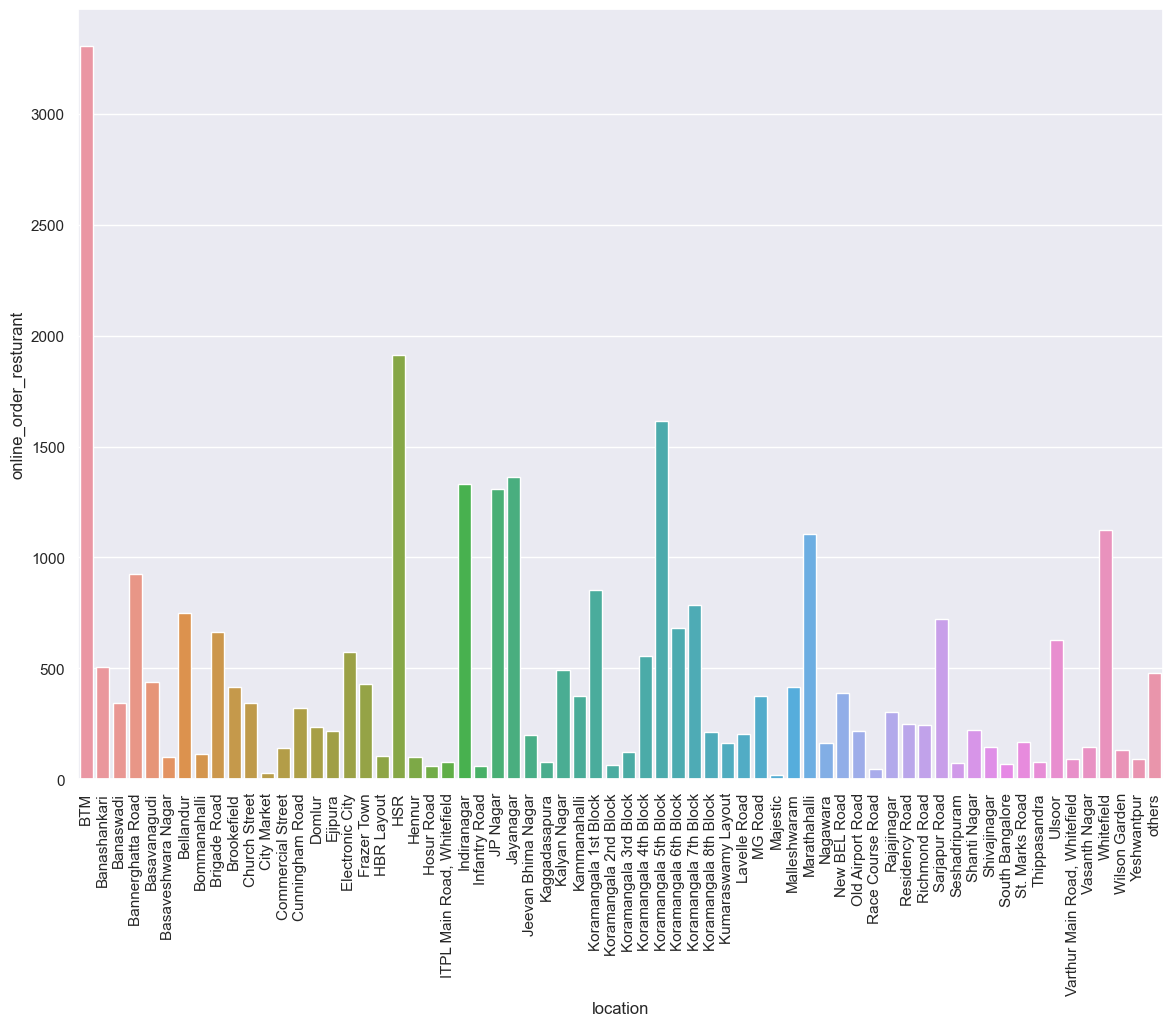

In [638]:
plt.figure(figsize=(14,10))
sns.barplot(x= 'location', y= 'online_order_resturant', data = x1)
plt.xticks(rotation = 90)
plt.show()

**Visualizing book table facilty , location wise**

In [652]:
zomato['book_table[1,0]'] = np.where(zomato['book_table'] == 'Yes' , 1, 0)
zomato.head(2)
x2 = zomato.groupby('location')['book_table[1,0]'].sum().reset_index(name= 'count_book_table_resturant')
x2

,location,count_book_table_resturant
0,BTM,168
1,Banashankari,64
2,Banaswadi,8
3,Bannerghatta Road,99
4,Basavanagudi,16
...,...,...
61,Vasanth Nagar,17
62,Whitefield,253
63,Wilson Garden,5
64,Yeshwantpur,2


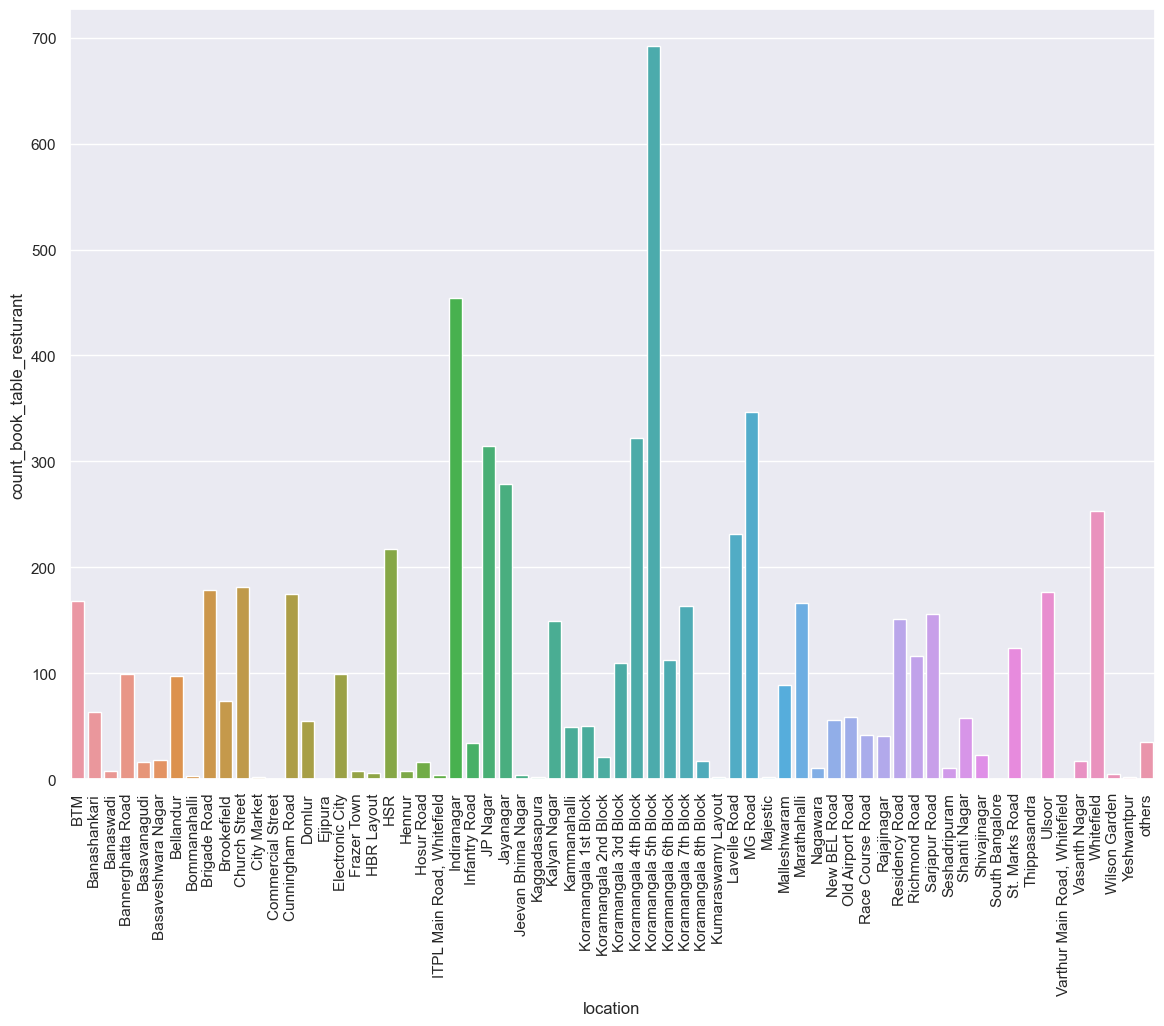

In [655]:
plt.figure(figsize= (14,10))
sns.barplot(x= 'location', y='count_book_table_resturant', data = x2)
plt.xticks(rotation = 90)
plt.show()

**visualizing types of resturants and rate**

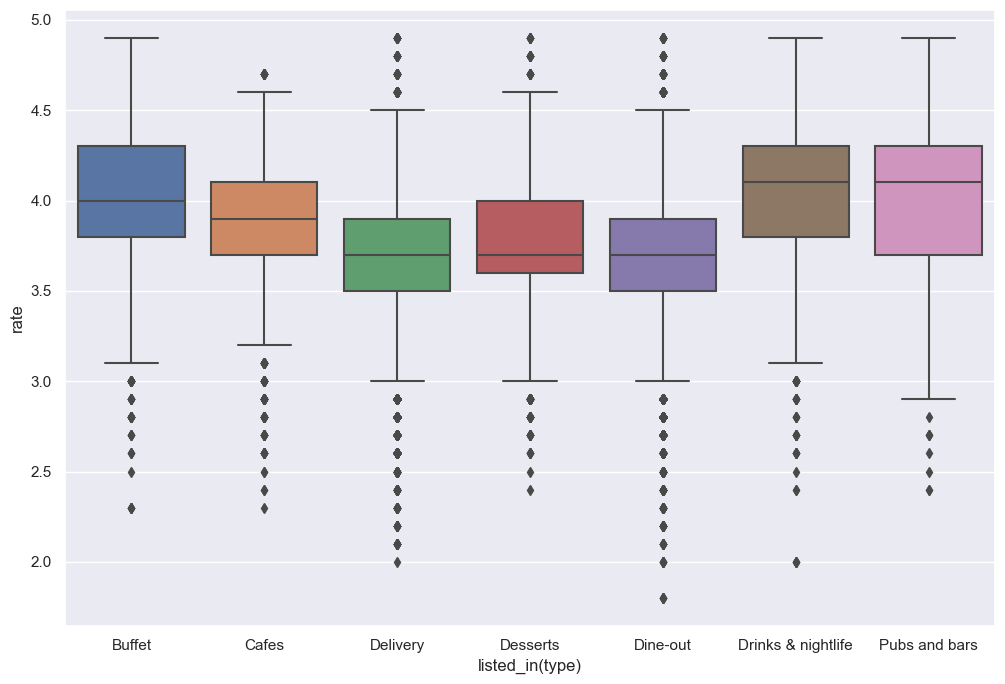

In [657]:
plt.figure(figsize = (12, 8))
sns.boxplot(x= 'listed_in(type)' , y= 'rate', data = zomato)
plt.show()

**Grouping type of resturents , location wise**

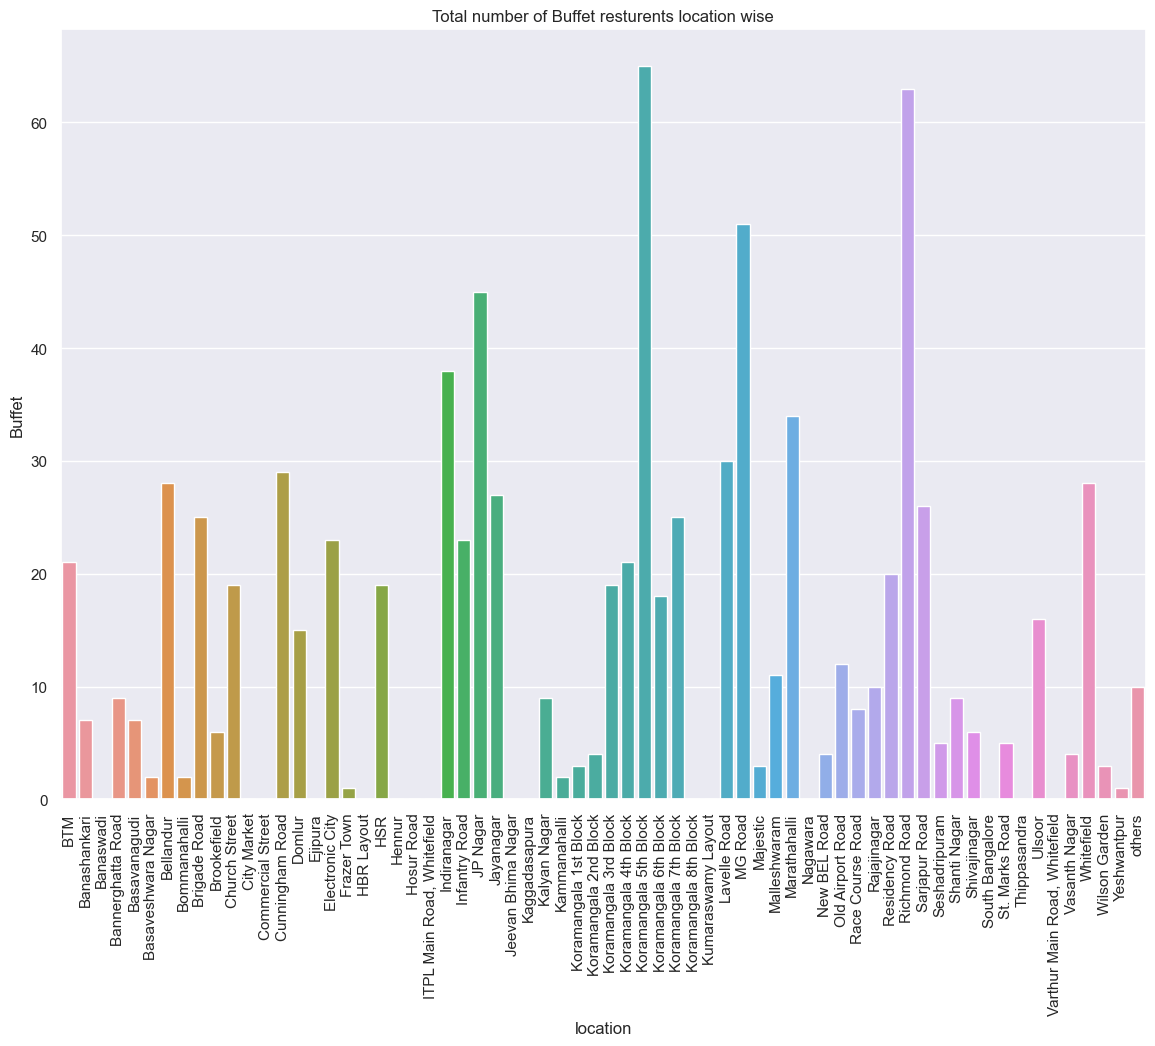

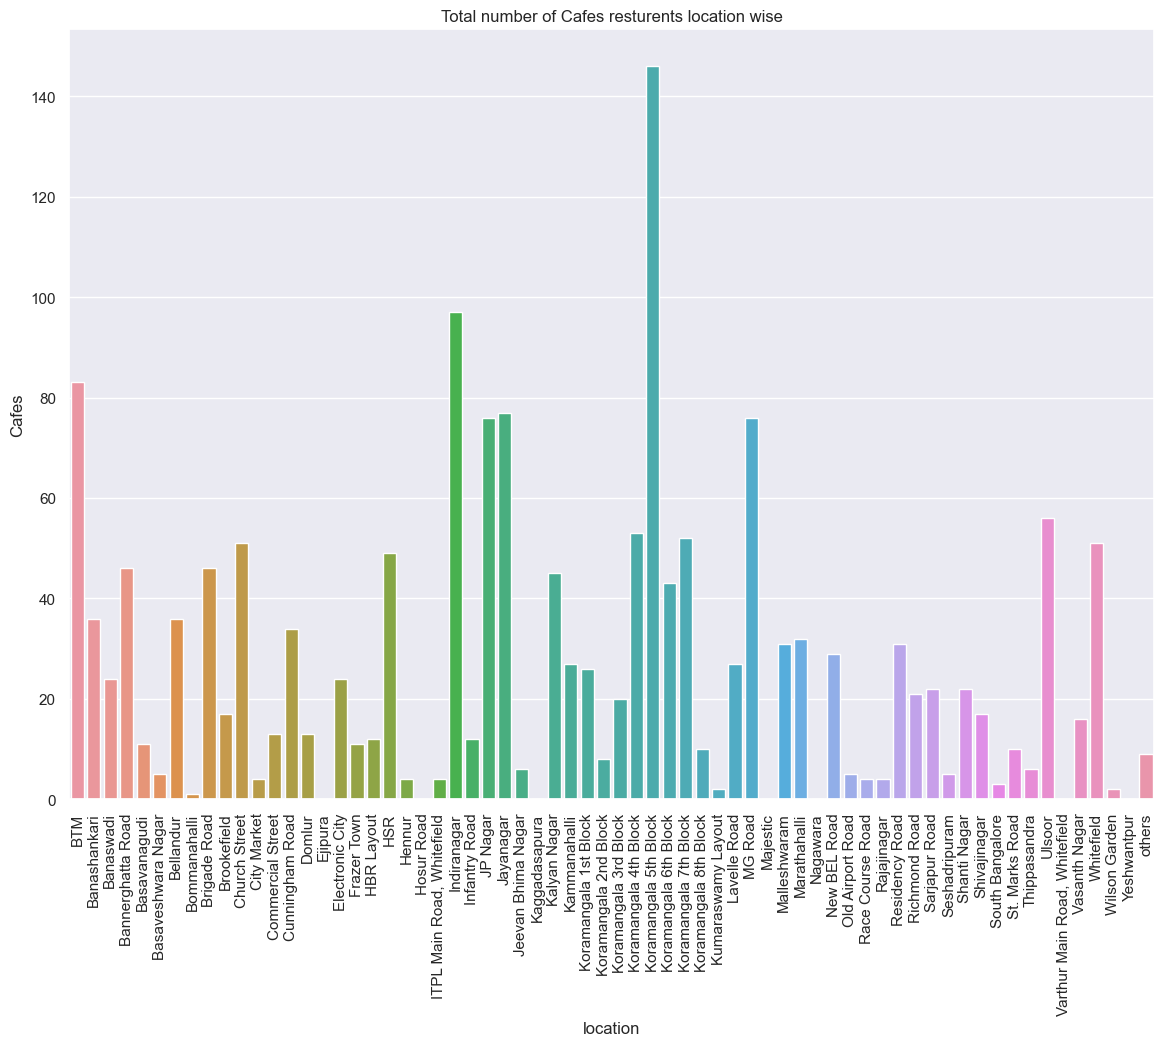

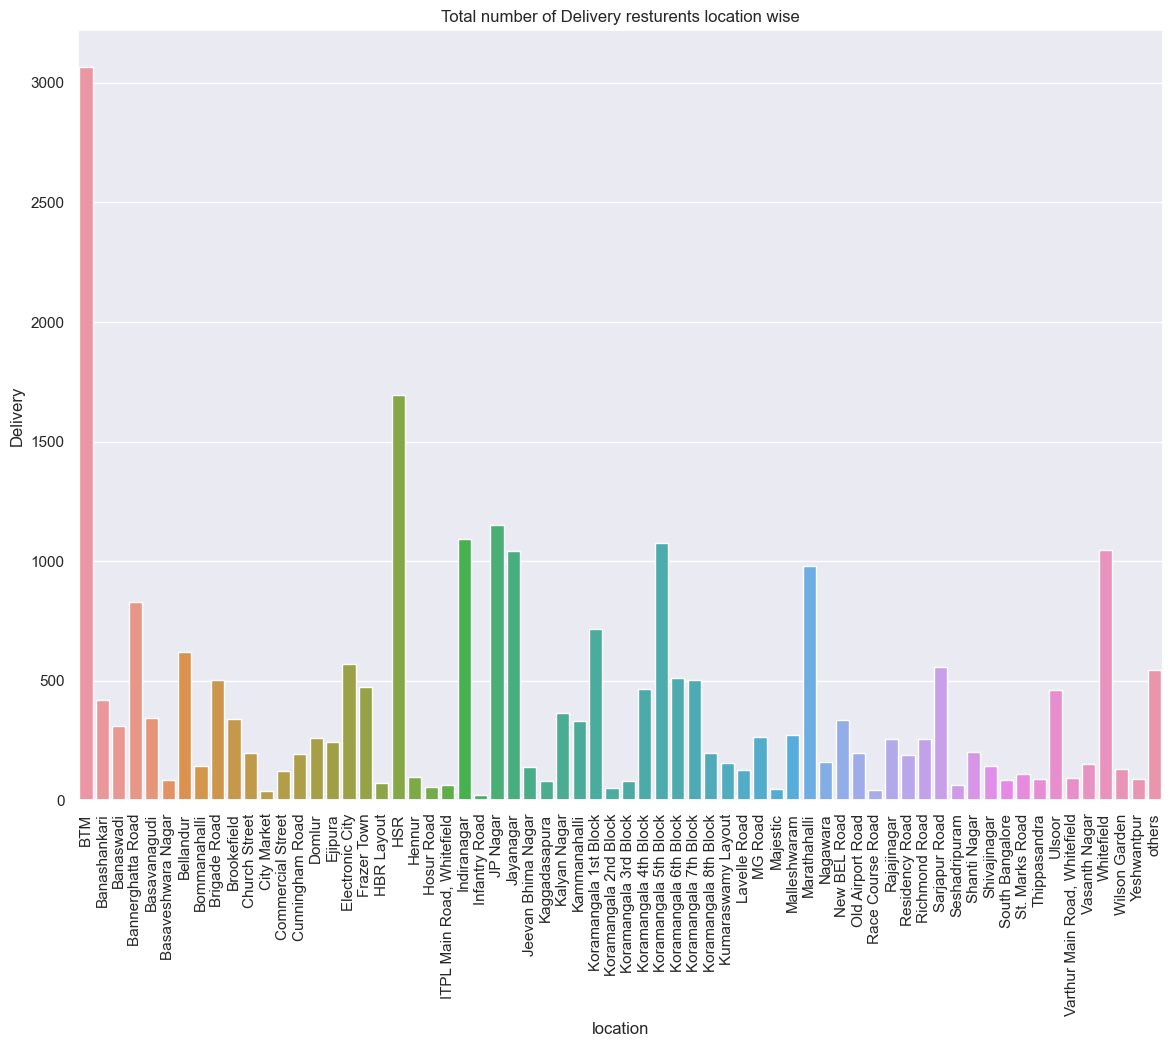

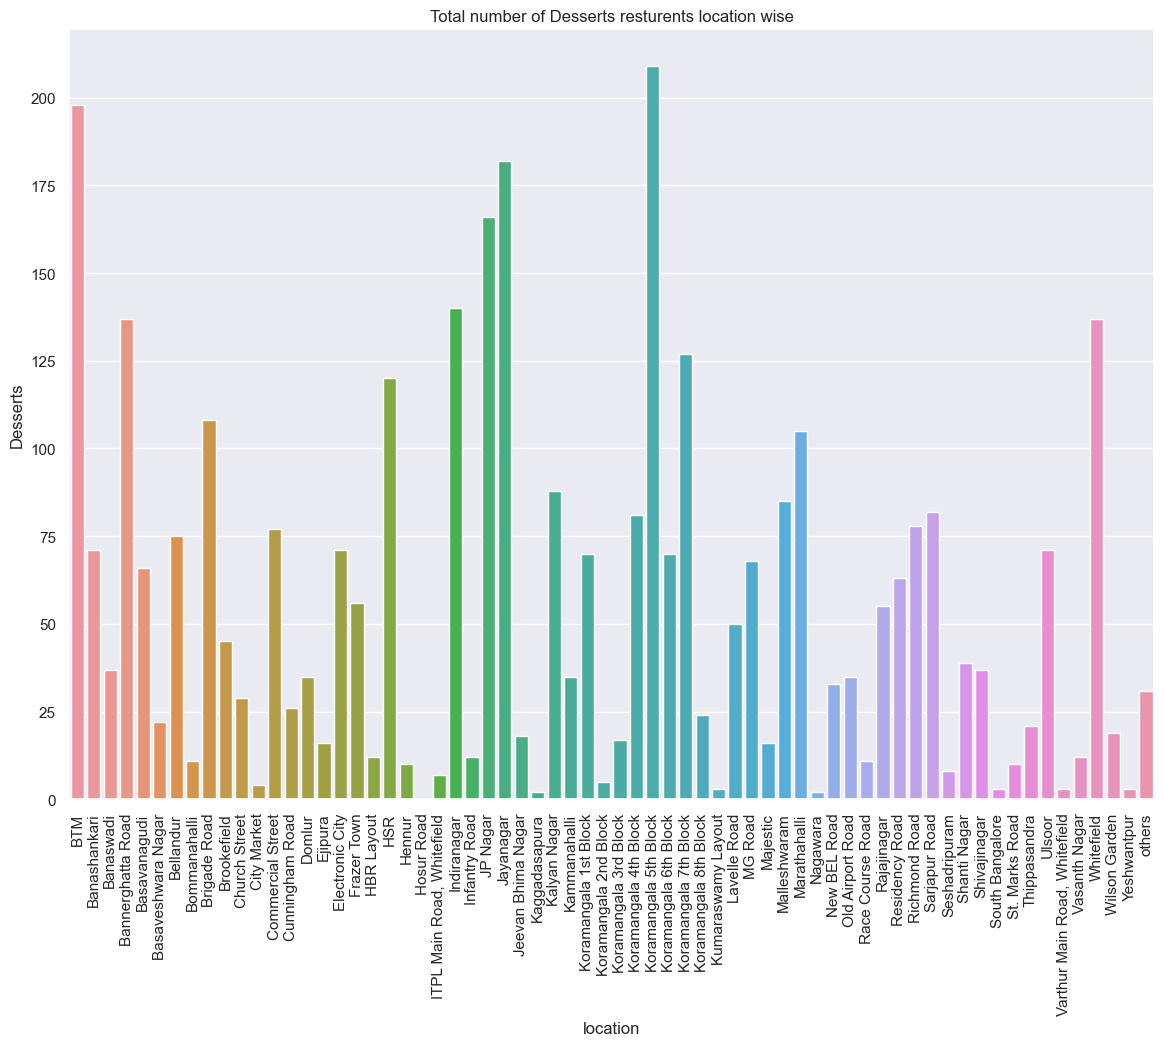

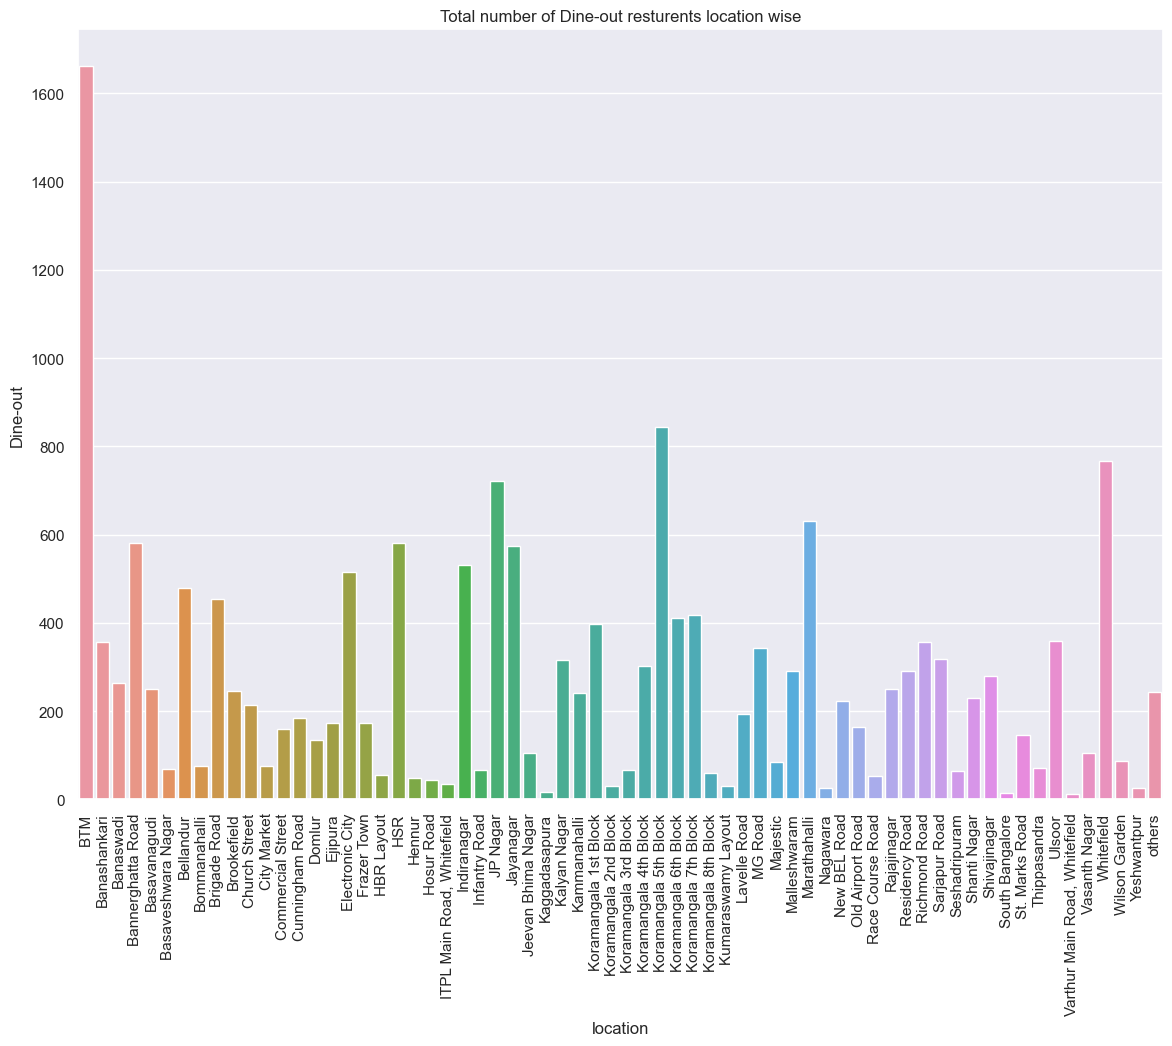

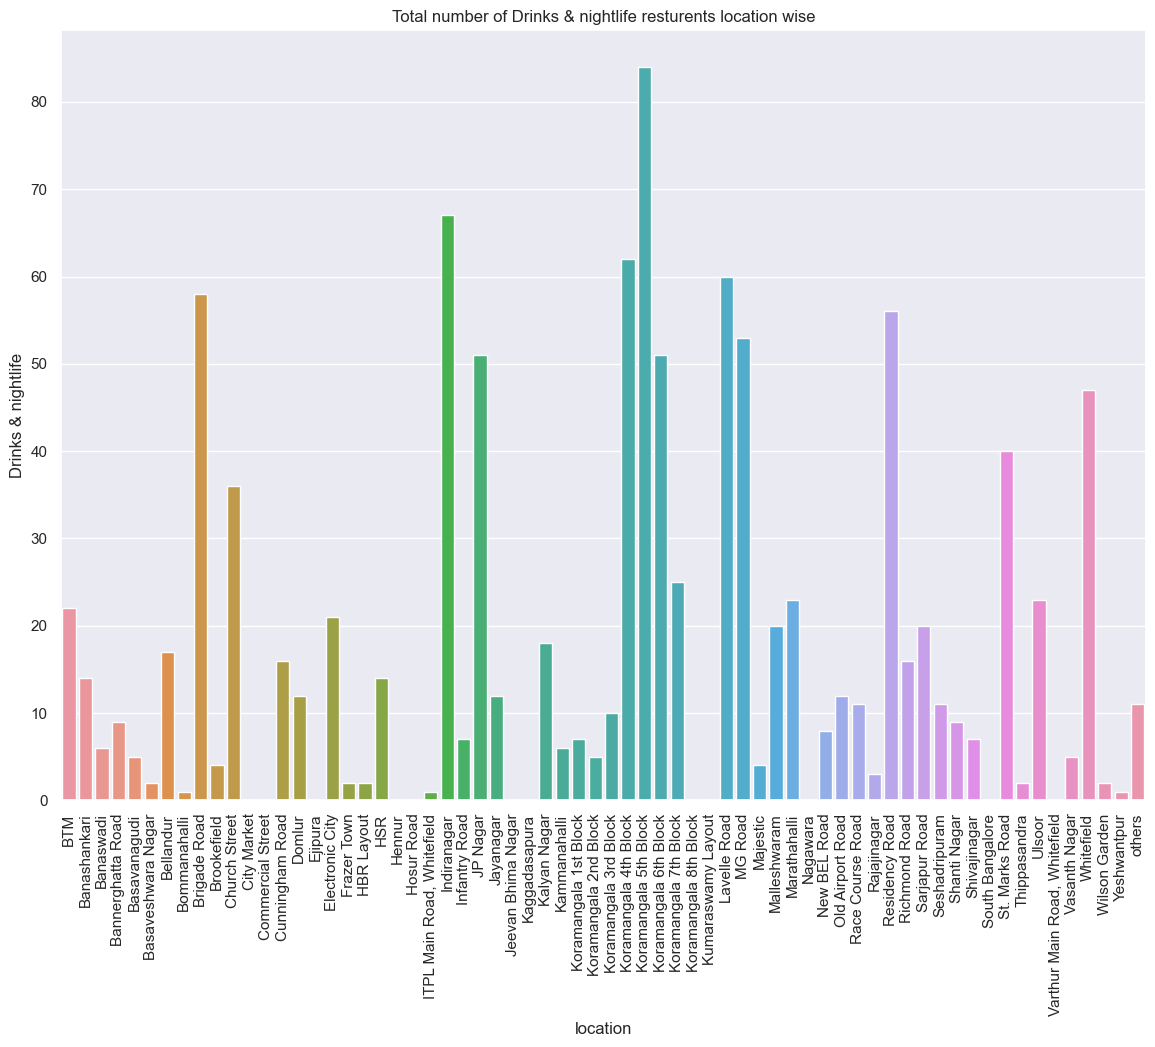

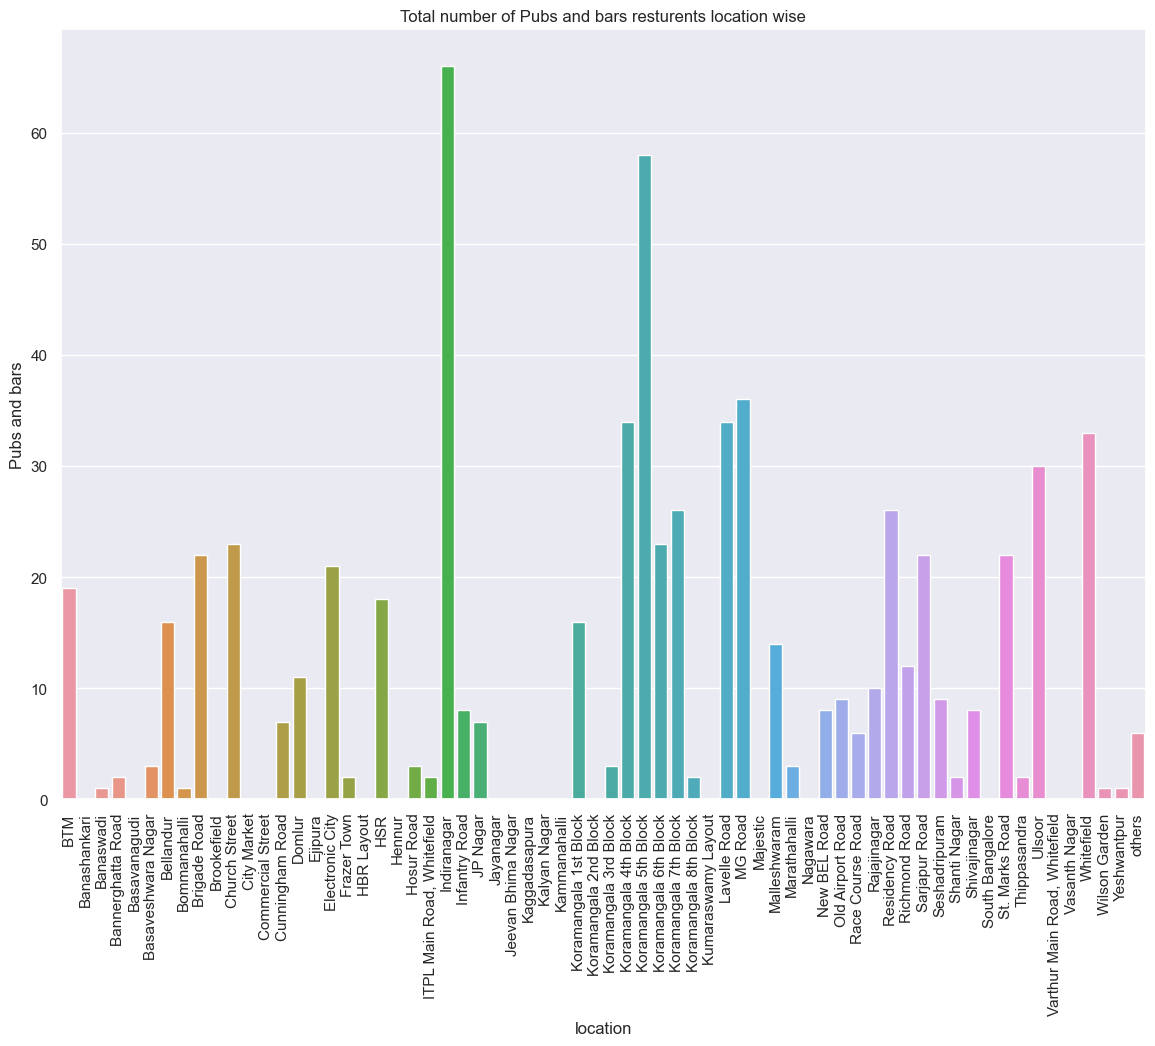

In [707]:
x3= pd.crosstab(zomato['location'], zomato['listed_in(type)'])
x3 = x3.reset_index()
x = ['Buffet','Cafes','Delivery','Desserts','Dine-out','Drinks & nightlife','Pubs and bars']
x3
for i in x:
    plt.figure(figsize=(14,10))
    sns.barplot(x= 'location' , y=i , data = x3)
    plt.title(f'Total number of {i} resturents location wise')
    plt.xticks(rotation = 90)
    plt.show()

**Number of Votes Location Wise** 

In [145]:
zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari


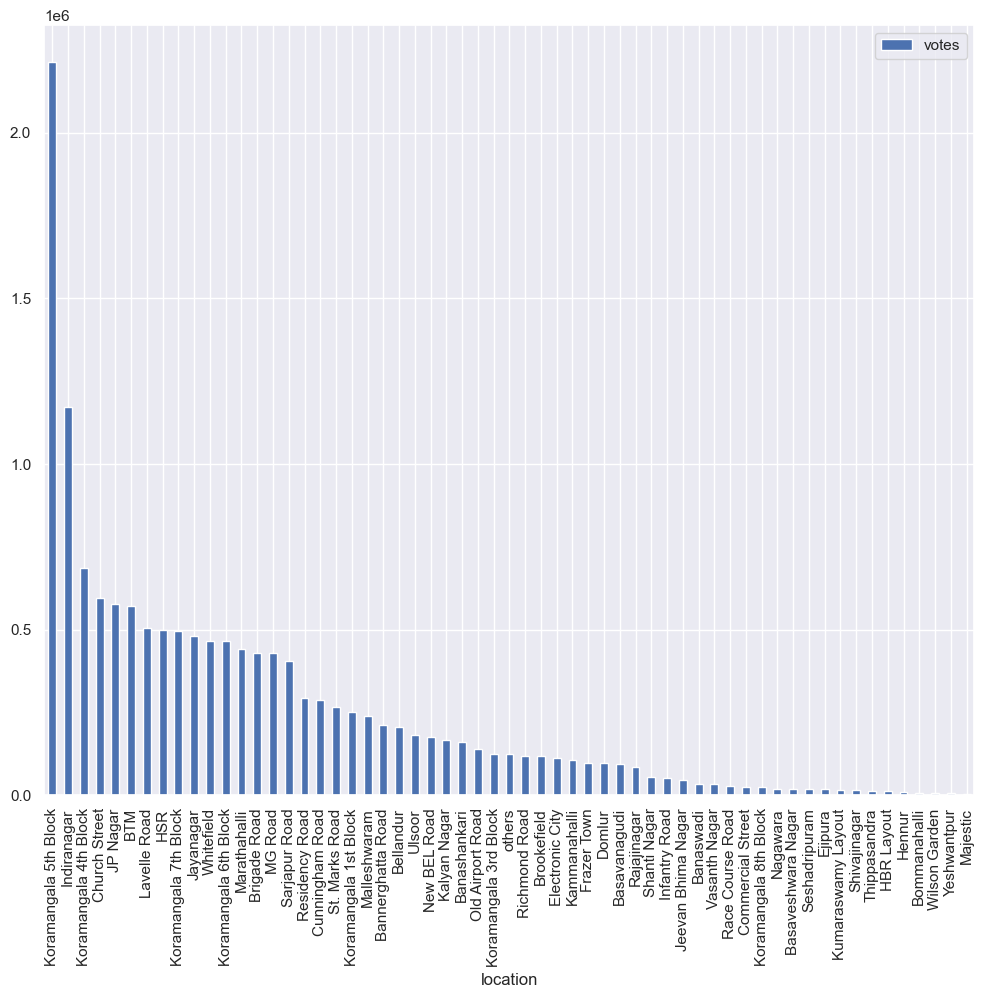

In [146]:
x= zomato.groupby('location')['votes'].sum().reset_index().sort_values(by = 'votes', ascending = False)

x= x.set_index('location')
x.plot(kind= 'bar', figsize = (12,10))
plt.show()

C:\Users\Bibha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bibha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Bibha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


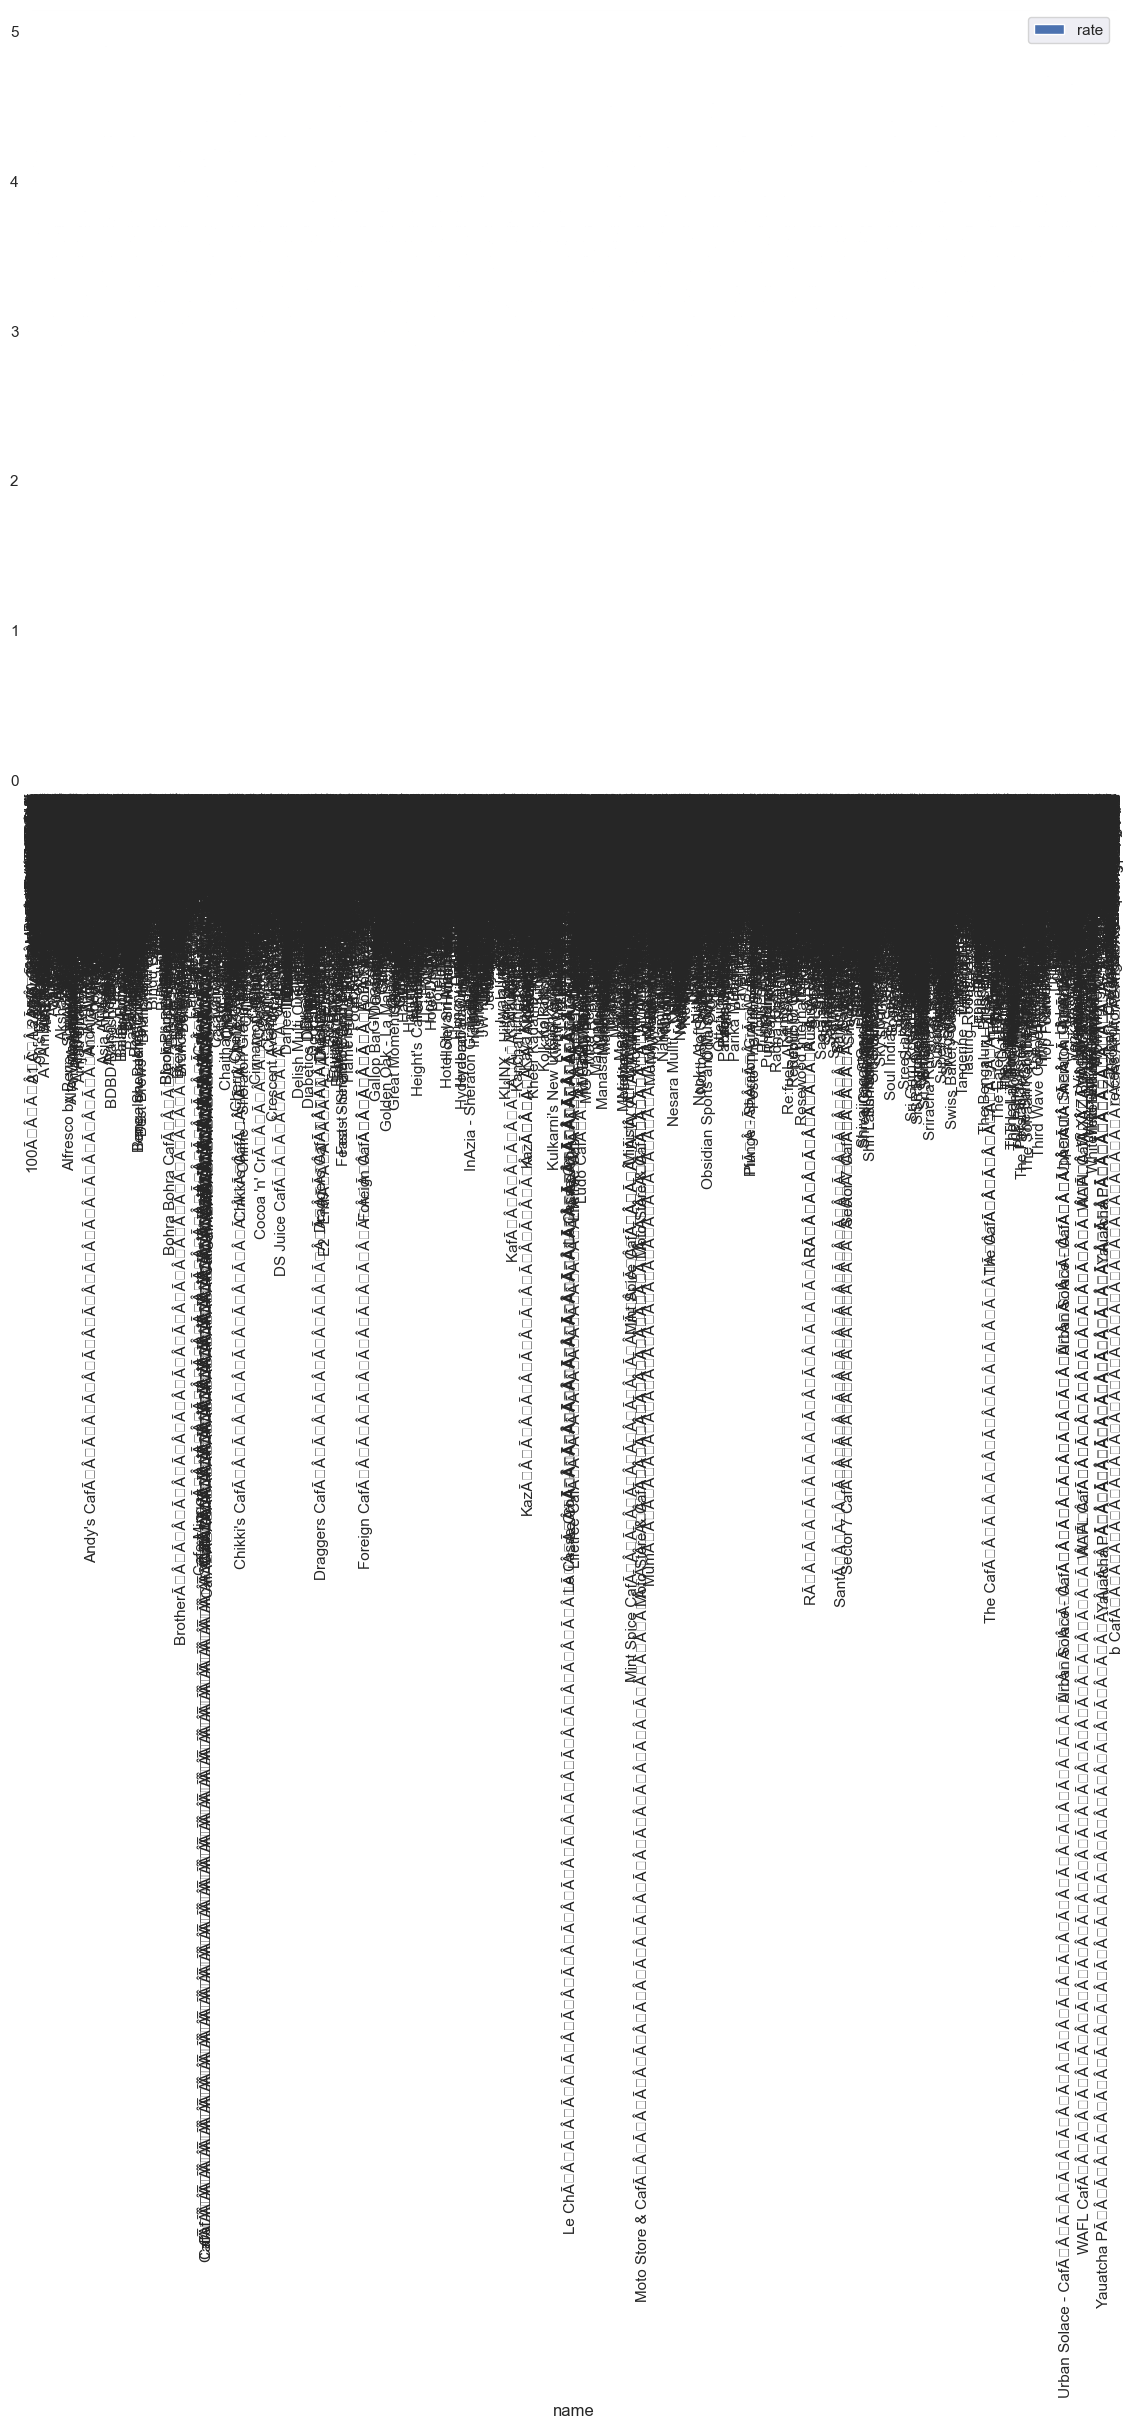